<a href="https://colab.research.google.com/github/Aleena24/Predictive_Analysis/blob/main/house_pricing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('/content/housing.csv', encoding='latin-1')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Preprocessing

In [8]:
df = df.drop(columns=['ocean_proximity'])
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  


In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [26]:
feature_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df[feature_columns]), columns=feature_columns)

y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16512, 8) (4128, 8) (16512,) (4128,)


# Exploratory Data Analysis (EDA)

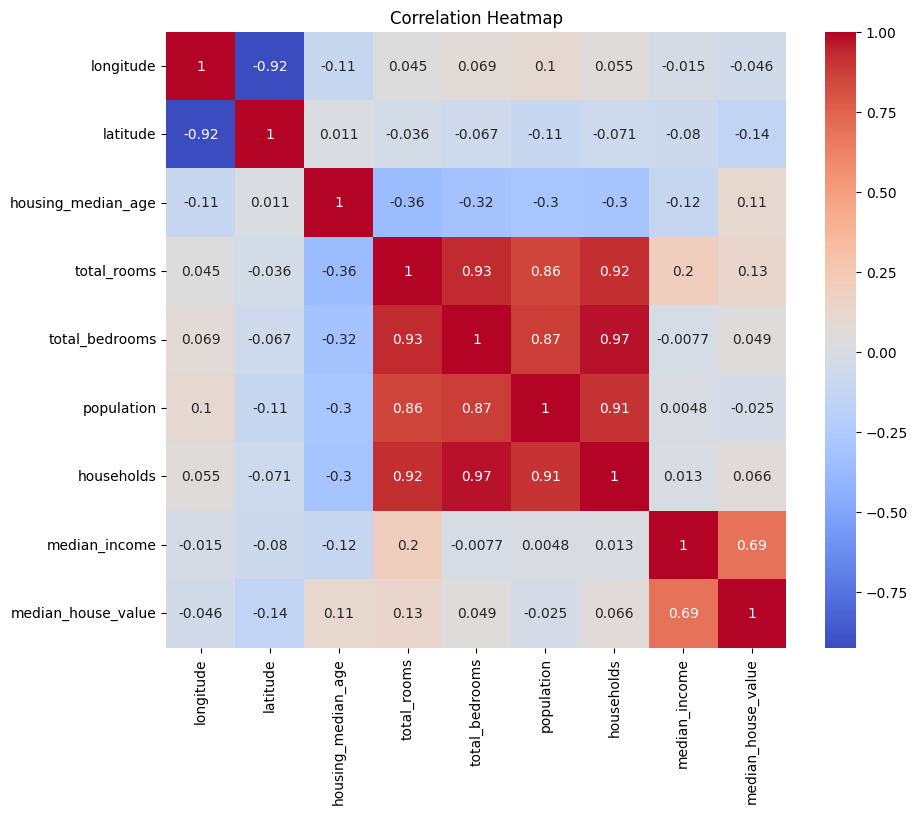

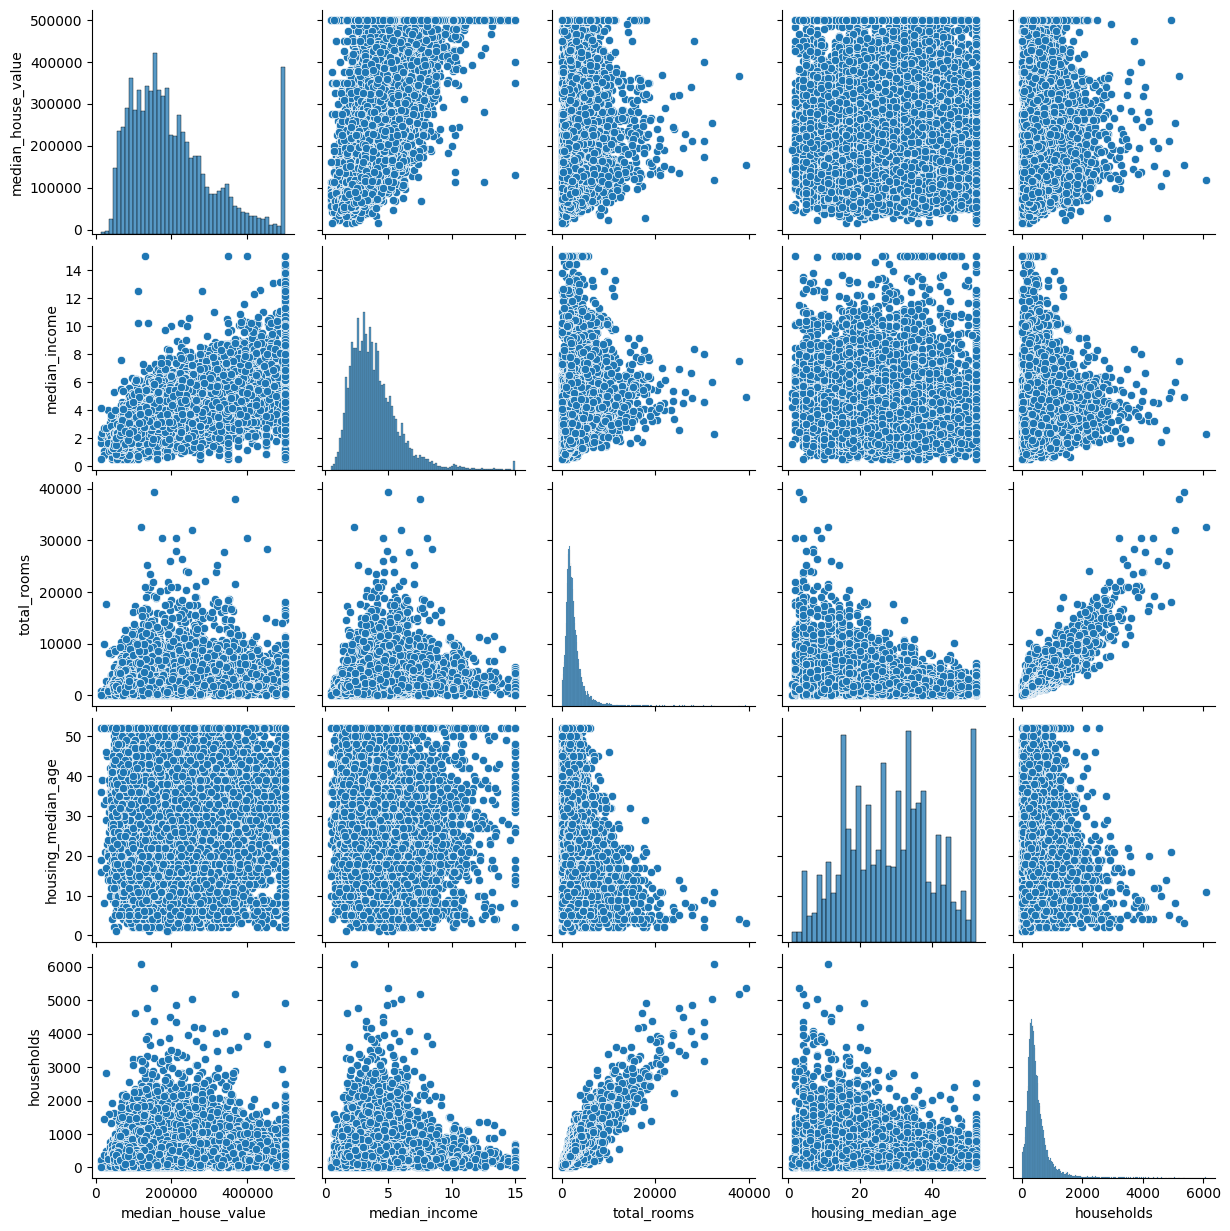

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot to explore the distribution
sns.pairplot(df[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'households']])
plt.show()


# Model Building

1. Linear Regression

Definition: Models the relationship between the dependent variable (median_house_value) and independent variables (e.g., median_income, total_rooms) using a linear equation.

Example:To predict house prices based on median income and total rooms. Linear regression will fit a line to the data, aiming to minimize the difference between the predicted house prices and the actual values. The model will find coefficients for median_income and total_rooms that best describe how these features influence house prices.

In [34]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

2. Ridge Regression

Definition: A variation of linear regression that adds L2 regularization to the model, which penalizes large coefficients to reduce overfitting and multicollinearity.

Example: When predicting house prices, Ridge Regression will include a penalty term for the size of the coefficients. This means that if some features are highly correlated, Ridge will shrink their coefficients to reduce their impact and stabilize the model.

In [33]:
ridge_model = Ridge()
params_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}

ridge_cv = GridSearchCV(ridge_model, params_ridge, cv=5)
ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)

3. Lasso Regression

Definition: A type of linear regression that adds L1 regularization, which encourages sparsity in the model by shrinking some coefficients to zero, thus performing feature selection.

Example: When using Lasso Regression to predict house prices, the model will not only fit a linear relationship but also reduce some feature coefficients to zero. This effectively excludes less important features from the model, simplifying it and potentially improving interpretability.

In [35]:
lasso_model = Lasso()
params_lasso = {'alpha': [0.1, 1.0, 10.0, 100.0]}

lasso_cv = GridSearchCV(lasso_model, params_lasso, cv=5)
lasso_cv.fit(X_train, y_train)

best_lasso = lasso_cv.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)

Hyperparameter Tuning
Ridge and Lasso models undergo hyperparameter tuning with GridSearchCV for different values of regularization strength (alpha).
The best alpha is selected based on cross-validation.

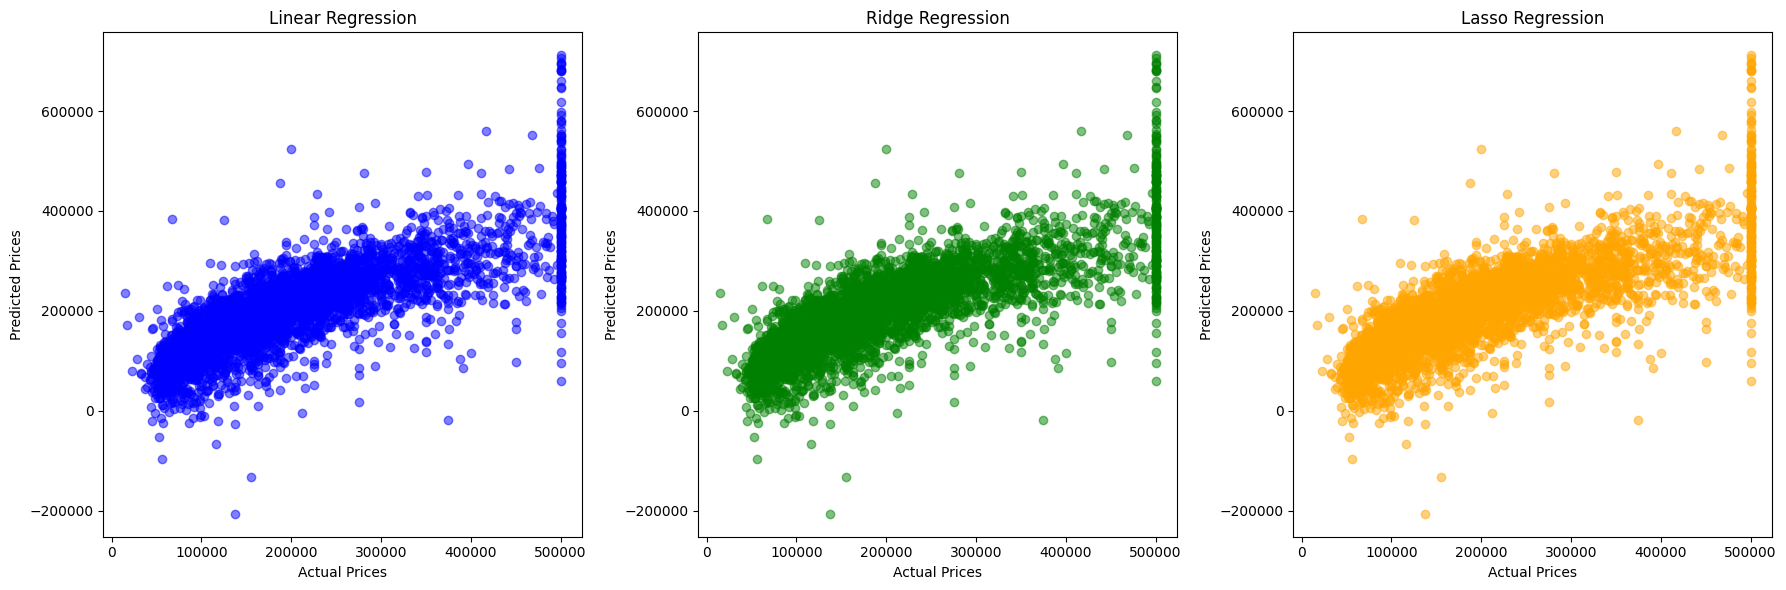

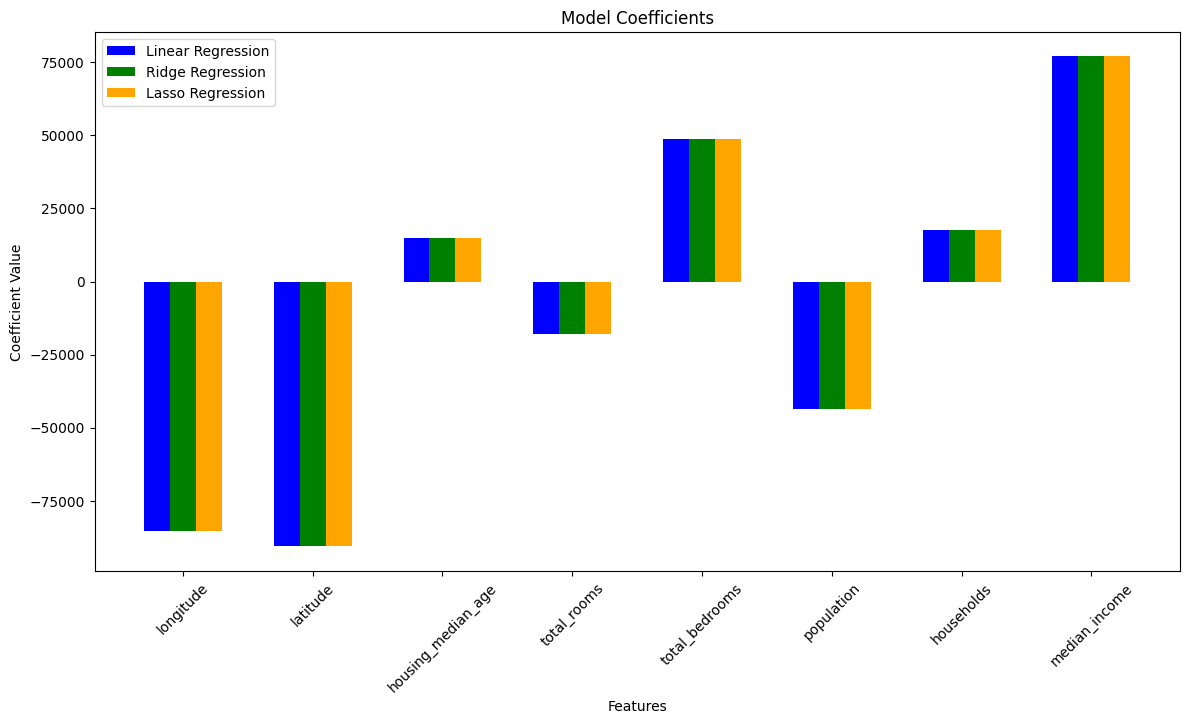

In [44]:
# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Fit models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression')

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression')

# Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='orange')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()

# Visualize Model Coefficients
coefficients_linear = linear_model.coef_
coefficients_ridge = ridge_model.coef_
coefficients_lasso = lasso_model.coef_

# Create DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_columns,
    'Linear Regression': coefficients_linear,
    'Ridge Regression': coefficients_ridge,
    'Lasso Regression': coefficients_lasso
})

# Plot coefficients
plt.figure(figsize=(14, 7))
x = np.arange(len(feature_columns))

plt.bar(x - 0.2, coefficients_df['Linear Regression'], 0.2, label='Linear Regression', color='blue')
plt.bar(x, coefficients_df['Ridge Regression'], 0.2, label='Ridge Regression', color='green')
plt.bar(x + 0.2, coefficients_df['Lasso Regression'], 0.2, label='Lasso Regression', color='orange')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Model Coefficients')
plt.xticks(x, feature_columns, rotation=45)
plt.legend()
plt.show()

Model Evaluation


In [36]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, r2, mae

rmse_linear, r2_linear, mae_linear = evaluate_model(y_test, y_pred_linear)
rmse_ridge, r2_ridge, mae_ridge = evaluate_model(y_test, y_pred_ridge)
rmse_lasso, r2_lasso, mae_lasso = evaluate_model(y_test, y_pred_lasso)

print(f"Linear Regression: RMSE={rmse_linear}, R²={r2_linear}, MAE={mae_linear}")
print(f"Ridge Regression: RMSE={rmse_ridge}, R²={r2_ridge}, MAE={mae_ridge}")
print(f"Lasso Regression: RMSE={rmse_lasso}, R²={r2_lasso}, MAE={mae_lasso}")


Linear Regression: RMSE=71084.13116794513, R²=0.6143987268246023, MAE=51835.734726283335
Ridge Regression: RMSE=71052.59052400888, R²=0.6147408401498002, MAE=51817.47754640395
Lasso Regression: RMSE=71078.53843181403, R²=0.6144594008822414, MAE=51833.81907627005


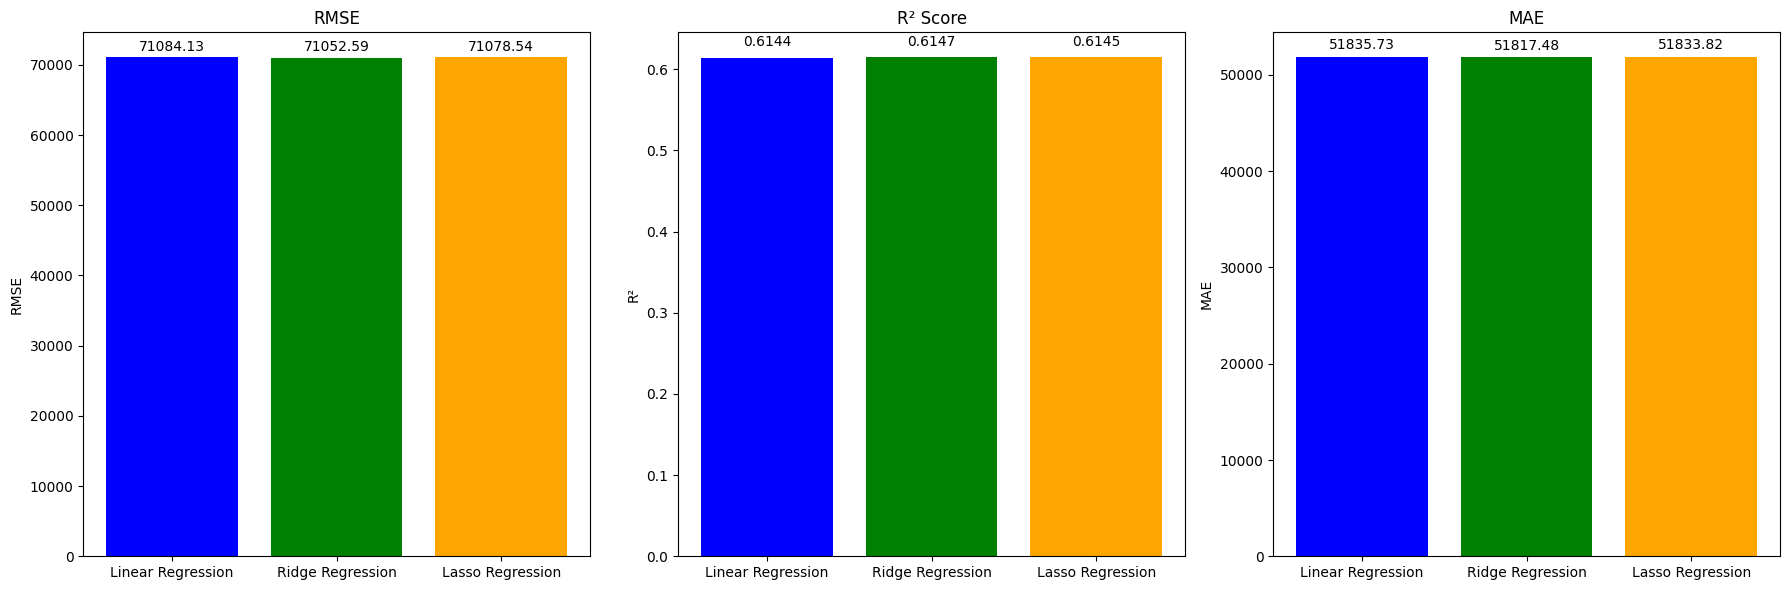

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
rmse = [71084.13, 71052.59, 71078.54]
r2 = [0.6144, 0.6147, 0.6145]
mae = [51835.73, 51817.48, 51833.82]

# Create subplots for RMSE, R², and MAE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot RMSE
axes[0].bar(models, rmse, color=['blue', 'green', 'orange'])
axes[0].set_title('RMSE')
axes[0].set_ylabel('RMSE')
for i, v in enumerate(rmse):
    axes[0].text(i, v + 500, f'{v:.2f}', ha='center', va='bottom')

# Plot R²
axes[1].bar(models, r2, color=['blue', 'green', 'orange'])
axes[1].set_title('R² Score')
axes[1].set_ylabel('R²')
for i, v in enumerate(r2):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Plot MAE
axes[2].bar(models, mae, color=['blue', 'green', 'orange'])
axes[2].set_title('MAE')
axes[2].set_ylabel('MAE')
for i, v in enumerate(mae):
    axes[2].text(i, v + 500, f'{v:.2f}', ha='center', va='bottom')

# Display the graphs
plt.tight_layout()
plt.show()


**Inference on the California Housing Dataset and Predictions**


The California Housing dataset, consisting of features such as longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, and median_income, provides a robust basis for predicting house prices. Here's a concise summary of the analysis:

Model Performance:

Linear Regression: Serves as a baseline with performance metrics (RMSE, R², MAE) that indicate reasonable prediction accuracy.
Ridge Regression: Shows slightly improved performance over Linear Regression with marginally lower RMSE and MAE, indicating better handling of potential multicollinearity through regularization.
Lasso Regression: Performs similarly to Ridge Regression but with slightly higher RMSE and MAE, suggesting that feature selection through Lasso's L1 regularization may not be as beneficial for this dataset.


Metrics Overview:


RMSE: Approximately 71,000, reflecting the average magnitude of prediction errors.
R²: Around 0.614, indicating that about 61.4% of the variance in house prices is explained by the features.
MAE: Approximately 51,800, showing the average absolute error in predictions.


Key Insights:


The dataset features effectively capture the variance in house prices, with all models performing similarly well.
Ridge Regression provides a slight edge, likely due to its regularization benefits, while Lasso's feature selection does not significantly impact performance in this instance.


Conclusion:

The models demonstrate a solid understanding of the housing market, with Ridge Regression offering the best performance among the three tested methods. The dataset's features are adequate for prediction, though further enhancements in feature engineering and model tuning could potentially improve accuracy.






